In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
#Loading the dataset
data = load_iris()
X = data.data  
y = data.target

In [10]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 99)

In [11]:
#Defining the model
clf = DecisionTreeClassifier(random_state=1)

In [12]:
#Training the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [13]:
#Making predidctions 
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


Hyperparameter Tuning with Decision Tree Classifier using GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)


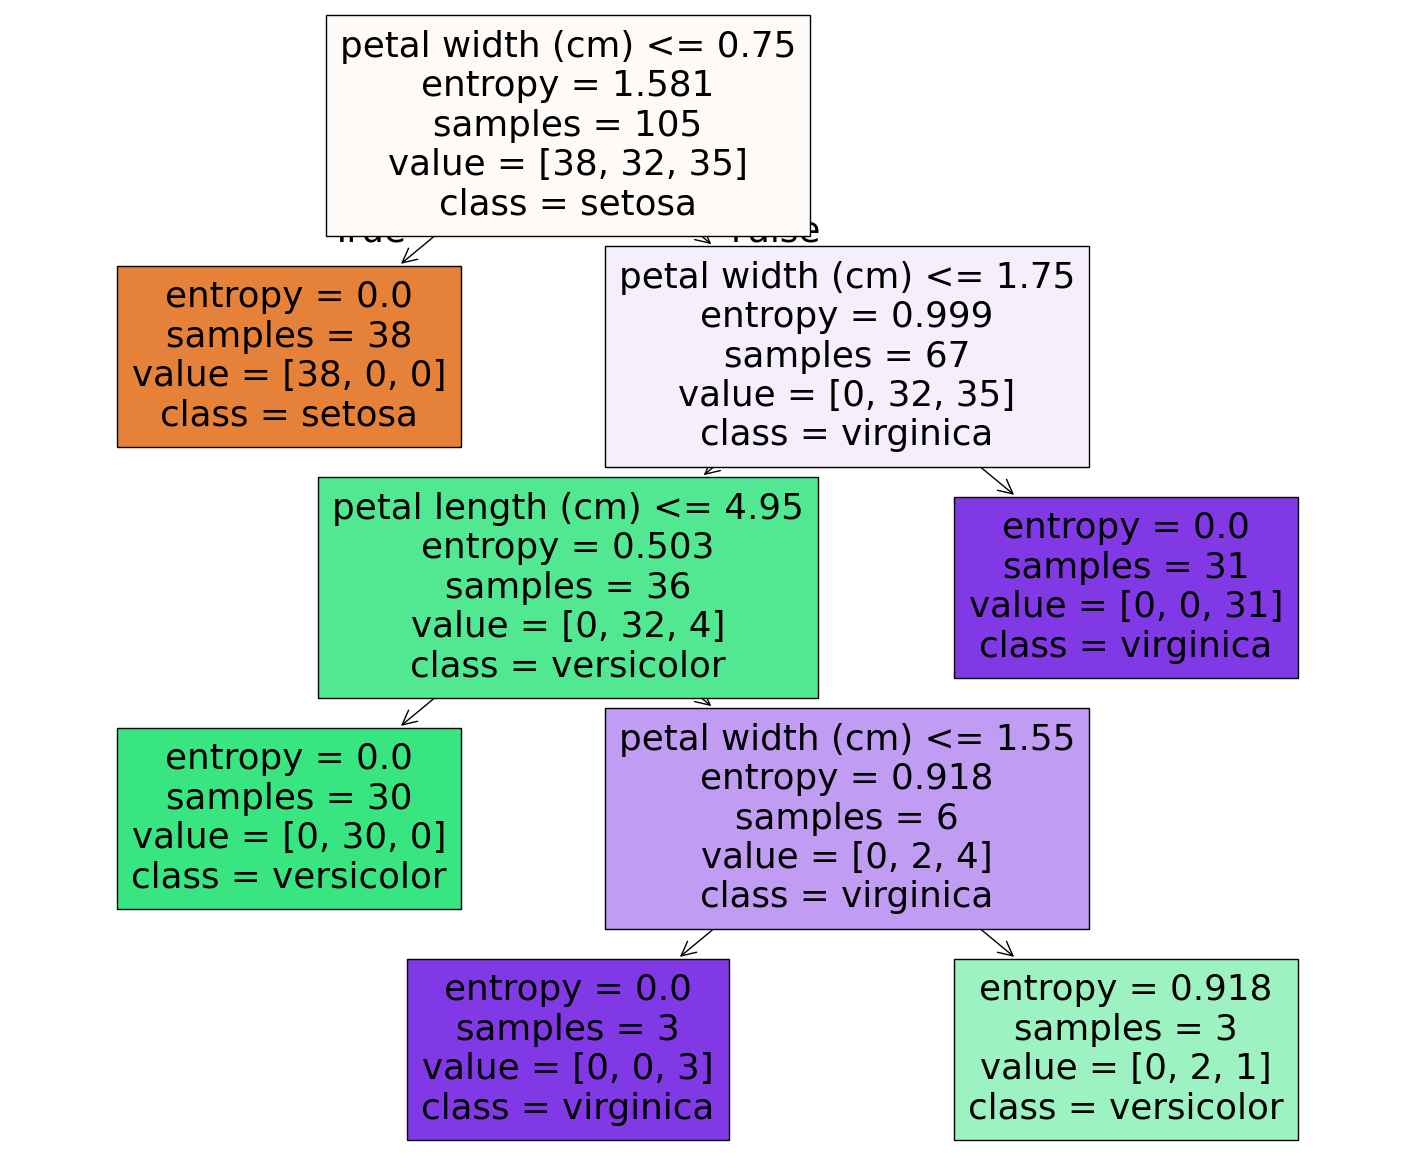

In [16]:
#Visualizing decision tree classifier 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
tree_clf = grid_search.best_estimator_

plt.figure(figsize=(18, 15))
plot_tree(tree_clf, filled=True, feature_names=data.feature_names,
          class_names=data.target_names)
plt.show()

Implementing Decision Tree Regression using Tree-Like structure

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

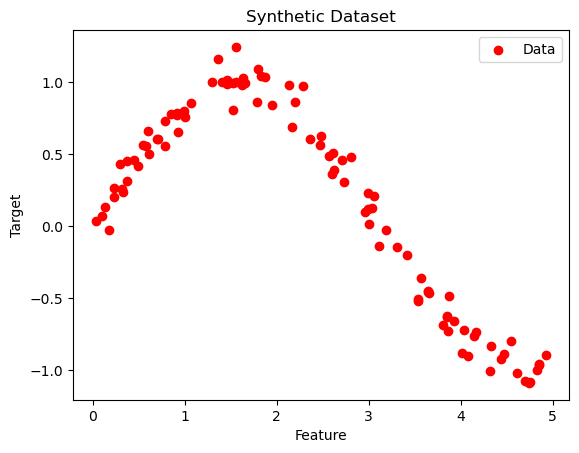

In [18]:
#Creating a sample dataset 
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

plt.scatter(X, y, color='red', label='Data')
plt.title("Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [19]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
#Initializig the decision tree regressor 
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

In [21]:
#Fitting Decision Tree Regressor Model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [22]:
#Predicting a New Value 
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0151


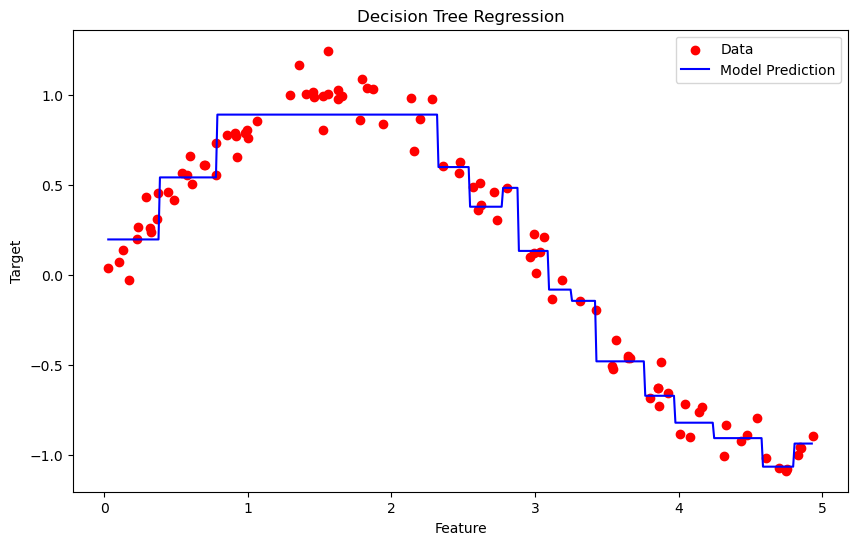

In [24]:
#Visualizing the result 
X_grid = np.arange(np.min(X), np.max(X), 0.01)[:, np.newaxis]
y_grid_pred = regressor.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_grid, y_grid_pred, color='blue', label='Model Prediction')
plt.title("Decision Tree Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

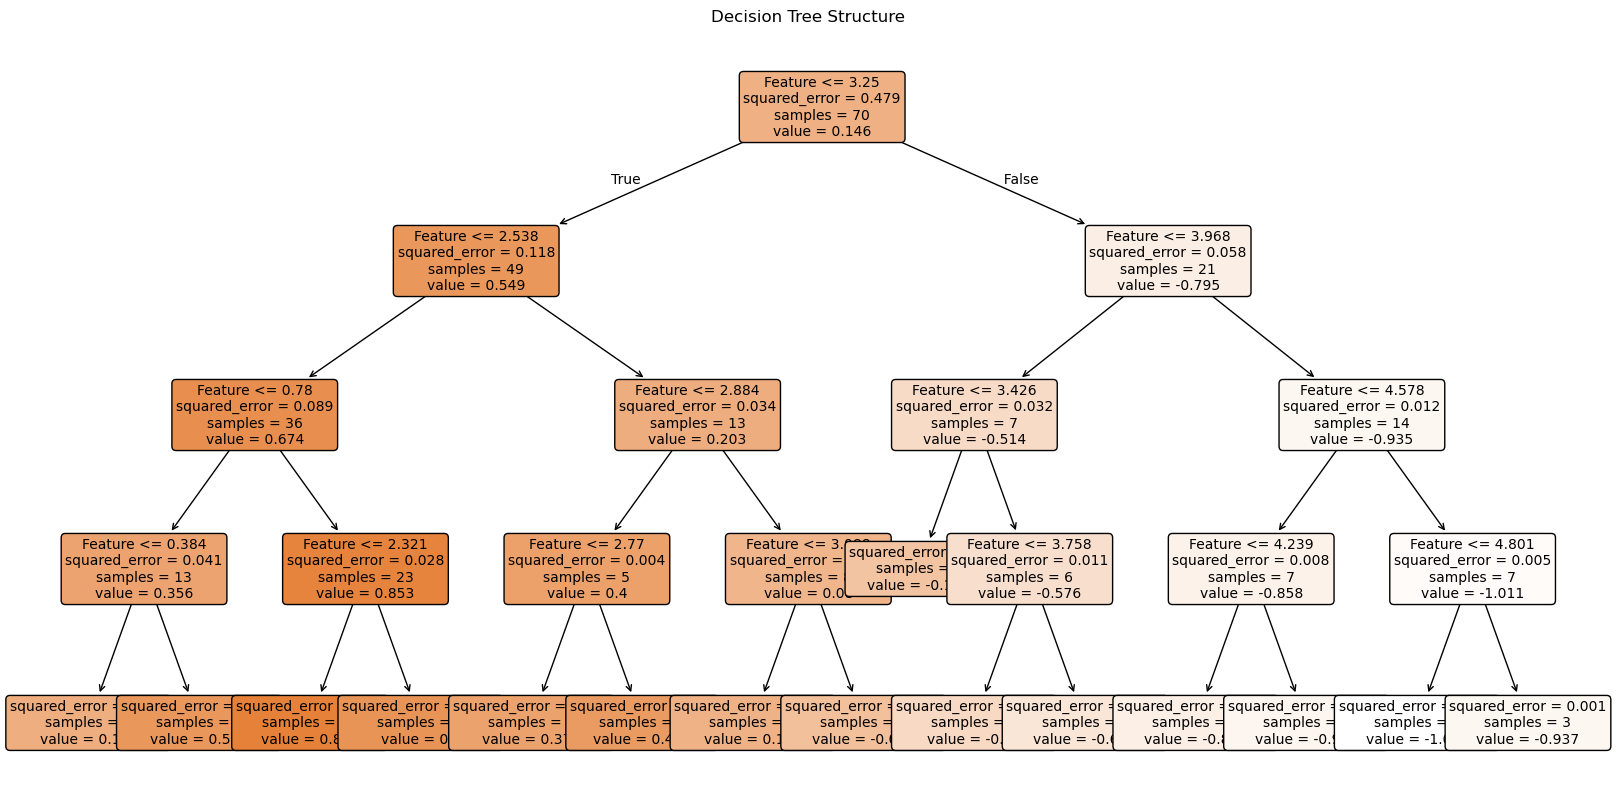

In [25]:
#Export and show the tres structure below 
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    regressor,
    feature_names=["Feature"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()